<div class="alert alert-block alert-info">

# **LoadComicData_rgb.ipynb**
***
### **This script loads comic book images for RGB neural network training. The images are made in a pair of one colored, and one grayscaled.**


In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

### Loads API-key

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '..\API Key here'

### Download the dataset - **Warning it's 2 GB**

In [ ]:
print("Downloading dataset from Kaggle...")
!kaggle datasets download -d cenkbircanoglu/comic-books-classification -p comic_dataset --unzip

### Process images into grayscale and colored pairs and splitting some proportion of the data into training data and test data. 

In [2]:
from sklearn.model_selection import train_test_split

input_images = []
output_images = []

image_paths = glob.glob('../Data/comic_dataset/**/*.jpg', recursive=True)
print(f"Found {len(image_paths)} images.")

for path in tqdm(image_paths[:2000]):  # Ajustiable limit of how many image the model loads
    bgr_img = cv2.imread(path)
    if bgr_img is None:
        continue
    bgr_img = cv2.resize(bgr_img, (256, 256))
    
    # Convert BGR to RGB
    color_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)


    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    gray_img = np.expand_dims(gray_img, axis=-1)

     # Normalize [0, 1] for RGB
    color_img = (color_img / 255.0).astype(np.float32)
    gray_img = (gray_img / 255.0).astype(np.float32)

    input_images.append(gray_img)
    output_images.append(color_img)
    
x = np.array(input_images)
y = np.array(output_images)
print(f"Input shape: {x.shape}, Output shape: {y.shape}")

# Split to avoid testing on same data the model is trained on. 20% (0.2) goes to testing  
x_train, x_test, y_train, y_test = train_test_split(
    input_images, output_images, test_size=0.2, random_state=42)

Found 42220 images.


100%|██████████| 2000/2000 [00:02<00:00, 688.83it/s]


Input shape: (2000, 256, 256, 1), Output shape: (2000, 256, 256, 3)


### Save processed data

In [3]:
# Creates folder if it doesn't exist yet
os.makedirs("../Data/prepared_data/RGB", exist_ok=True)

# Saves files
np.save("../Data/prepared_data/RGB/comic_input_grayscale_train.npy", x_train)
np.save("../Data/prepared_data/RGB/comic_output_color_train.npy", y_train)
np.save("../Data/prepared_data/RGB/comic_input_grayscale_test.npy", x_test)
np.save("../Data/prepared_data/RGB/comic_output_color_test.npy", y_test)
print("Data saved to ../Data/prepared_data/")

Data saved to ../Data/prepared_data/


### Display processed data to confirm stuff is working.

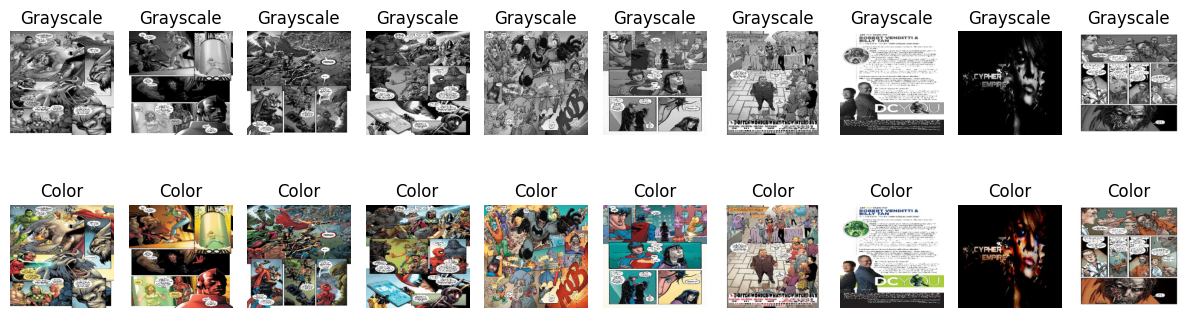

In [7]:
num_samples = 10
plt.figure(figsize=(12, 4))
for i in range(num_samples):
    plt.subplot(2, num_samples, i+1)
    plt.imshow(x[i].squeeze(), cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    plt.subplot(2, num_samples, i+1+num_samples)
    plt.imshow(y[i])
    plt.title("Color")
    plt.axis('off')
plt.tight_layout()
plt.show()

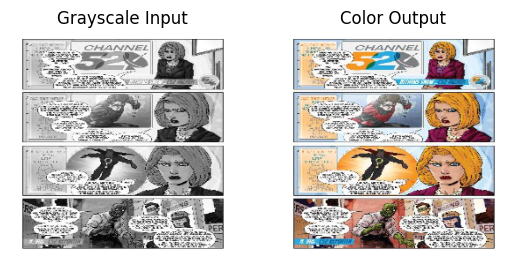

In [8]:
# Display from test 
plt.subplot(1, 2, 1)
plt.imshow(x_test[0].squeeze(), cmap='gray')
plt.title("Grayscale Input")
plt.axis('off')

plt.subplot(1, 2, 2)
rgb_img = (y_test[0])
plt.imshow(rgb_img)
plt.title("Color Output")
plt.axis('off')
plt.show()

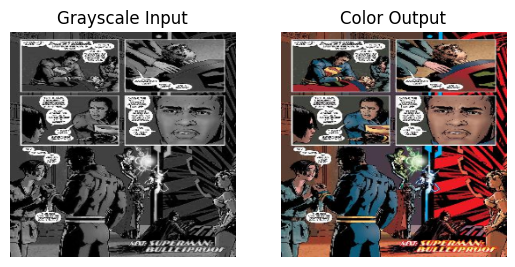

In [9]:
# Display from train
plt.subplot(1, 2, 1)
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.title("Grayscale Input")
plt.axis('off')

plt.subplot(1, 2, 2)
rgb_img = (y_train[0])
plt.imshow(rgb_img)
plt.title("Color Output")
plt.axis('off')
plt.show()
